In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

%run ../scripts/post_scraping_text_processing.py load

df loaded.
15425 rows x 5 columns


In [2]:
corpus = df['text'].copy()

years = pd.to_datetime(df['release']).dt.year
y = years.map(lambda x: 1 if x <2002 else 0)

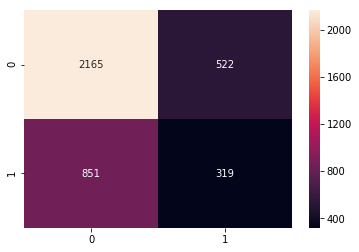

In [3]:
cvec = CountVectorizer()
cvec.fit(corpus)
matrix = cvec.transform(corpus)
X = matrix.toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, gnb.predict(X_test)), fmt = 'g', annot = True)

In [4]:
tn, fp, fn, tp = confusion_matrix(y_test, gnb.predict(X_test)).ravel()

sens = tp/(tp + fn)
spec = tn/(tn + fp)
print('Sensitivity:',sens)
print('Specificity:',spec)

Sensitivity: 0.27264957265
Specificity: 0.805731298846


Pretty shitty performance.

In [5]:
from sklearn.linear_model import LogisticRegression

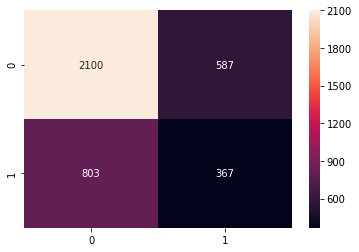

In [6]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test)), fmt = 'g', annot = True)

In [7]:
tn, fp, fn, tp = confusion_matrix(y_test, lr.predict(X_test)).ravel()

sens = tp/(tp + fn)
spec = tn/(tn + fp)
print('Sensitivity:',sens)
print('Specificity:',spec)

Sensitivity: 0.313675213675
Specificity: 0.781540751768


In [8]:
from sklearn.metrics import roc_curve

In [39]:
pd.Series(lr.coef_[0]).sort_values()[:10]

97014    -1.167213
26384    -1.092515
53734    -1.019120
40882    -1.018894
56531    -1.018640
7298     -0.998966
74231    -0.967523
76213    -0.953486
46414    -0.949393
103736   -0.937365
dtype: float64

In [41]:
for item in pd.Series(lr.coef_[0]).sort_values()[:100].index:
    print(cvec.get_feature_names()[item], '\t\t\t', pd.Series(lr.coef_[0]).sort_values()[item])

çalan 			 -1.16721268417
düzenleme 			 -1.09251543317
koşa 			 -1.01911965673
helal 			 -1.01889369756
kısa 			 -1.01864035201
azrail 			 -0.998965730615
sevmiyor 			 -0.967523047228
soru 			 -0.953485585674
kalbine 			 -0.949392771517
şi 			 -0.937364540027
peşindeyim 			 -0.929917445345
yorma 			 -0.926565198008
kalbimin 			 -0.922026855973
fark 			 -0.905258709898
cümle 			 -0.899335952517
başlıyor 			 -0.880132494366
susuz 			 -0.880037070622
arım 			 -0.87757126887
ellerimde 			 -0.876821774056
ulan 			 -0.859578667144
yandığım 			 -0.859000685766
ellerinde 			 -0.855640585186
sustum 			 -0.849370490568
gadınım 			 -0.848486829287
melek 			 -0.845266224167
bülbülleri 			 -0.842405474256
canın 			 -0.834452648555
kandım 			 -0.833761891523
yollardan 			 -0.832412670166
bulmak 			 -0.83186108325
ölüyorum 			 -0.829708099405
tuttum 			 -0.824149928837
bakış 			 -0.823785205536
içimi 			 -0.818578131477
karası 			 -0.80974184167
kimiz 			 -0.799482578532
tabi 			 -0.792032345211
aşkta